<a href="https://colab.research.google.com/github/micherjo/DrugReviewsDataMining/blob/main/INLS_690_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Drugs.com Reviews Exploratory Analysis

**Importing Libraries**

In [ ]:
# for basic operations
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff




SyntaxError: ignored

**Reading the data**

In [120]:
train_data = pd.read_csv('drugsComTrain_raw.tsv', delimiter = '\t', quoting = 1, engine='python', encoding='utf-8', error_bad_lines=False)
# getting the shape of the data
train_data.shape

test_data = pd.read_csv('drugsComTest_raw.tsv', delimiter = '\t', quoting = 1, engine='python', encoding='utf-8', error_bad_lines=False)
# getting the shape of the data
test_data.shape

(53766, 7)

In [121]:
train_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [122]:
test_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [123]:
# describing the data set

train_data.describe()
test_data.describe()

,Unnamed: 0,rating,usefulCount
count,53766.000000,53766.000000,53766.000000
mean,116386.701187,6.976900,27.989752
std,67017.739881,3.285207,36.172833
min,0.000000,1.000000,0.000000
25%,58272.500000,4.000000,6.000000
50%,116248.500000,8.000000,16.000000
75%,174586.750000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


In [125]:
# checking if there is any null data or not

train_data.isnull().any().any()
test_data.isnull().any().any()

True

**Describing the data according to the Length of the reviews**

In [124]:
# adding a length column for analyzing the length of the reviews

train_data['length'] = data['review'].apply(len)

train_data.groupby('length').describe().sample(10)

Unnamed: 0                               ... usefulCount             
            count           mean           std  ...         50%   75%    max
length                                          ...                         
511.0        60.0  131253.900000  68649.332094  ...        15.5  42.0  167.0
241.0        67.0  114314.388060  70029.991211  ...        14.0  34.0  169.0
792.0        45.0  126319.066667  75789.526612  ...         8.0  21.0  101.0
135.0        46.0  123242.326087  69423.837270  ...        16.5  34.0  283.0
662.0        55.0  118283.563636  64560.366076  ...         8.0  35.5  104.0
154.0        55.0  117830.618182  62491.413566  ...        16.0  40.0  152.0
312.0        75.0  127539.480000  64473.231438  ...        19.0  48.5  162.0
685.0        72.0  113767.000000  73668.712107  ...        13.0  34.0  334.0
121.0        51.0  121593.568627  58437.104072  ...        20.0  34.0  183.0
207.0        54.0  121984.185185  64865.168846  ...        16.5  36.5  160.0

[10 rows x 24 columns]

**Describing the data according to the ratings**

In [126]:
train_data.groupby('rating').describe()

Unnamed: 0                               ... length                
            count           mean           std  ...    50%     75%     max
rating                                          ...                       
1.0       21619.0  114357.591517  68250.669499  ...  455.0  690.00  2815.0
2.0        6931.0  114035.416823  66887.107940  ...  458.0  683.00  2376.0
3.0        6513.0  113862.795025  66284.812353  ...  455.0  691.00  1963.0
4.0        5012.0  115538.758380  66005.962142  ...  474.0  705.00  2733.0
5.0        8013.0  115148.165731  66742.015996  ...  462.0  699.00  2368.0
6.0        6343.0  115143.671606  67002.366471  ...  460.0  690.75  2583.0
7.0        9456.0  115635.986887  66954.972118  ...  447.0  684.50  1544.0
8.0       18890.0  116656.208364  67090.587220  ...  462.0  692.00  1603.0
9.0       27531.0  116259.178599  66657.529801  ...  451.0  687.00  3103.0
10.0      50989.0  116964.874345  66860.192550  ...  459.0  688.00  6192.0

[10 rows x 24 columns]

**Describing the data according to the drug Name**

In [127]:
train_data.groupby('drugName').describe().sample(10)

Unnamed: 0                 ... length       
                                     count           mean  ...    75%    max
drugName                                                   ...              
Valganciclovir                         1.0  148324.000000  ...    NaN    NaN
Citric acid / potassium citrate        1.0  117198.000000  ...  729.0  729.0
Mifepristone                           1.0   22702.000000  ...    NaN    NaN
Next Choice                           30.0  105057.600000  ...  755.5  781.0
Feldene                                9.0  127466.333333  ...  736.0  754.0
L-methylfolate                        73.0   75648.109589  ...  615.0  761.0
Molindone                              1.0  120444.000000  ...  419.0  419.0
Colazal                                8.0   27678.125000  ...  157.0  157.0
Floxin                                 1.0  195292.000000  ...    NaN    NaN
Valcyte                                1.0   52990.000000  ...    NaN    NaN

[10 rows x 32 columns]

Describing data according to how many people found the review useful

In [129]:
train_data.groupby('usefulCount').describe().sample(10)

Unnamed: 0                               ... length                
                 count           mean           std  ...    50%     75%     max
usefulCount                                          ...                       
78               292.0  113808.986301  68512.691009  ...  457.0  671.75  1301.0
21              2414.0  115650.211268  67148.397906  ...  459.0  702.00  1767.0
100              165.0  109548.012121  67046.495784  ...  452.0  727.00   773.0
448                3.0  155927.000000  75543.913560  ...  353.0  492.00   631.0
771                2.0   76291.000000  19139.966353  ...  751.0  751.00   751.0
233               12.0  127549.916667  53860.958643  ...  396.5  466.25   536.0
329                2.0   90440.500000  54295.194193  ...    NaN     NaN     NaN
103              151.0  113836.715232  65202.987681  ...  478.0  685.00   812.0
406                1.0  126260.000000           NaN  ...    NaN     NaN     NaN
64               495.0  118581.513131  68402.098277  ...  494.5  732.75   798.0

[10 rows x 24 columns]

**Describe data according to condition treated**




In [130]:
train_data.groupby('condition').describe().sample(10)

Unnamed: 0  ...  length
                                                  count  ...     max
condition                                                ...        
Juvenile Idiopathic Arthritis                      17.0  ...   770.0
Head Lice                                          67.0  ...   817.0
Thrombocytopenia                                    2.0  ...     NaN
Left Ventricular Dysfunction                       19.0  ...   760.0
t Pac with Cyclobenzaprine (cyclobenzaprine)        2.0  ...   687.0
min / sitagliptin)                                 26.0  ...   710.0
Mycoplasma Pneumonia                                1.0  ...     NaN
Prostatitis                                        91.0  ...   794.0
Bacterial Vaginitis                               524.0  ...  2733.0
Diverticulitis                                    142.0  ...  1864.0

[10 rows x 32 columns]

## Data Visualizations

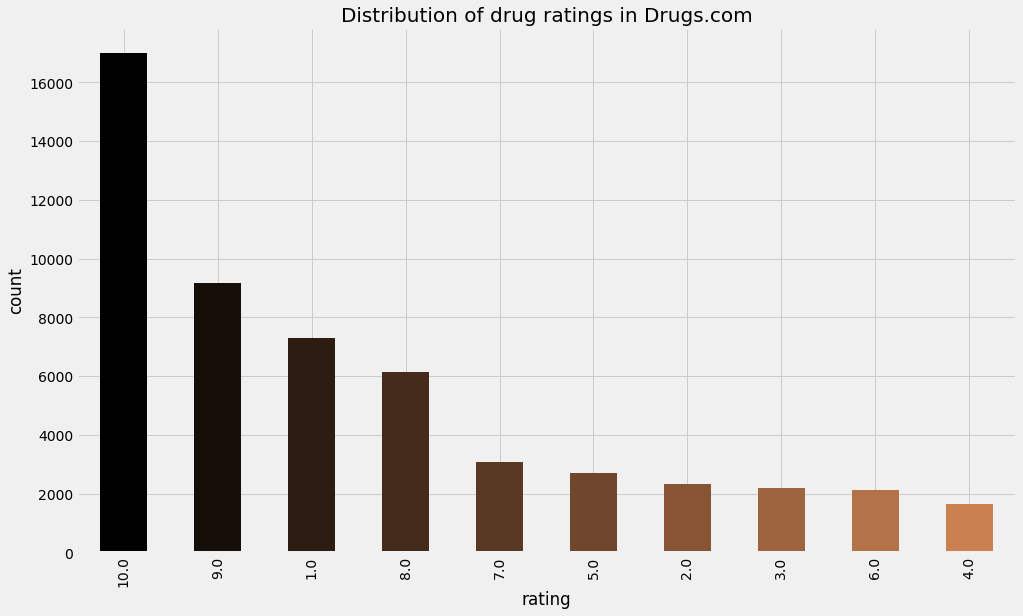

In [ ]:

color = plt.cm.copper(np.linspace(0, 1, 15))
data['rating'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of drug ratings in Drugs.com', fontsize = 20)
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

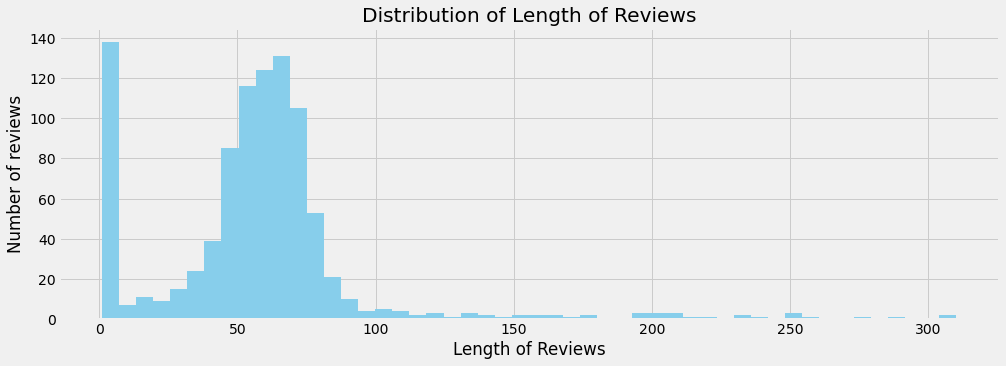

In [ ]:

data['length'].value_counts().plot.hist(color = 'skyblue', figsize = (15, 5), bins = 50)
plt.title('Distribution of Length of Reviews')
plt.xlabel('Length of Reviews')
plt.ylabel('Number of reviews')
plt.show()

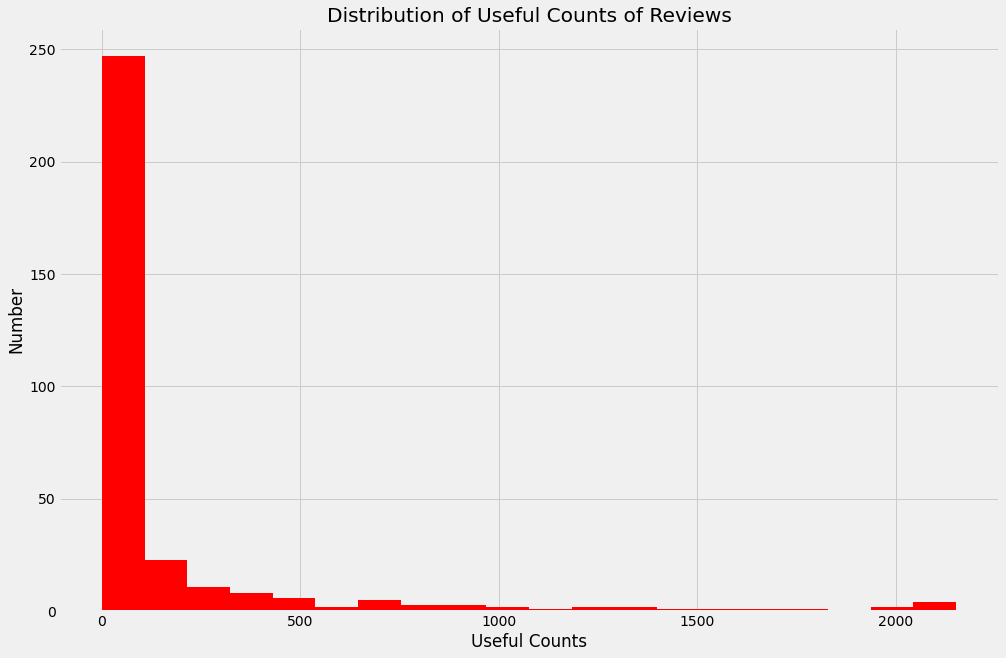

In [ ]:
data['usefulCount'].value_counts().plot.hist(color = 'red', figsize = (15, 10), bins = 20)
plt.title('Distribution of Useful Counts of Reviews')
plt.xlabel('Useful Counts')
plt.ylabel('Number')
plt.show()

In [ ]:
data[data['length'] == 21]['review'].iloc[0]

'"Fast and effective."'

In [ ]:
data[data['length'] == 50]['review'].iloc[0]

'"This is a great medication with no side effects."'

In [ ]:
data[data['length'] == 150]['review'].iloc[0]

'"I had mild symptoms of a yeast infection. I used the 3-dose tercanozole. It&#039;s caused far more itching and burning than the yeast infection did."'

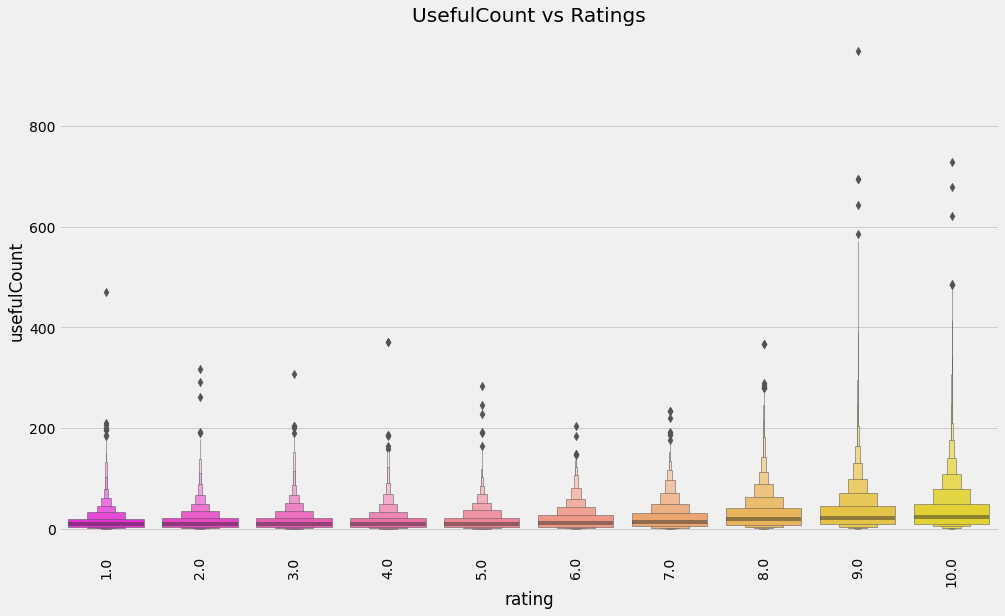

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.boxenplot(data['rating'], data['usefulCount'], palette = 'spring')
plt.title("UsefulCount vs Ratings")
plt.xticks(rotation = 90)
plt.show()

The above shows that the higher the rating given to the drug, the more useful others found the review.

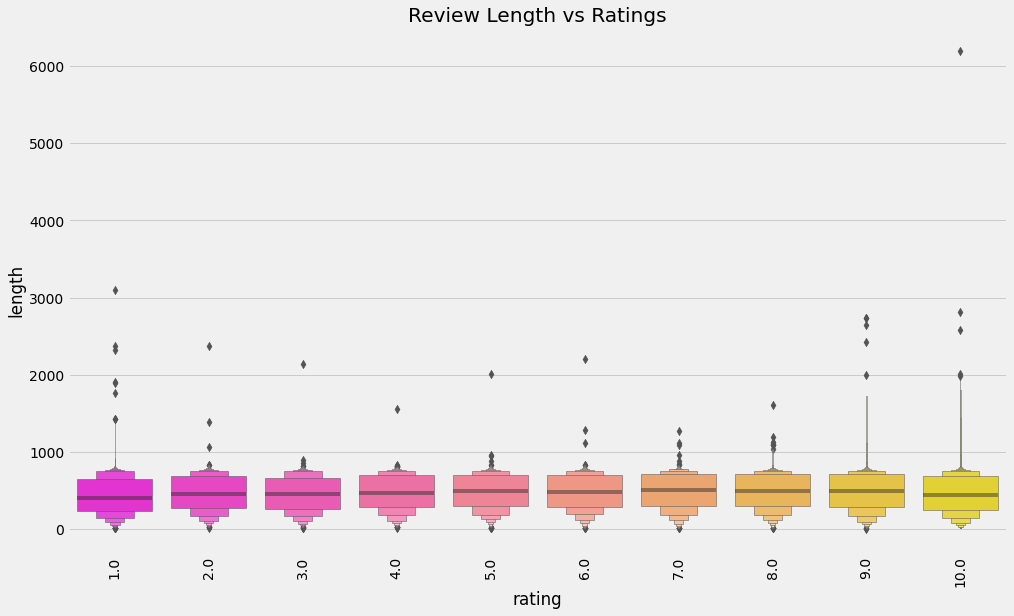

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.boxenplot(data['rating'], data['length'], palette = 'spring')
plt.title("Review Length vs Ratings")
plt.xticks(rotation = 90)
plt.show()

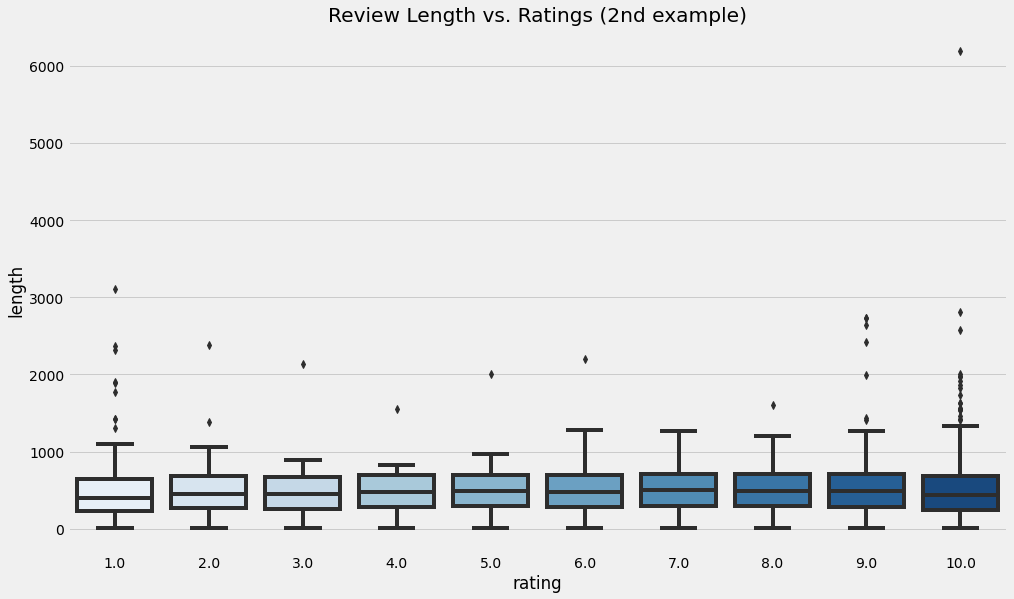

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.boxplot(data['rating'], data['length'], palette = 'Blues')
plt.title("Review Length vs. Ratings (2nd example)")
plt.show()

Users tend to write more on low and highly scored drugs.

# NLP - Word Vectorization using TFIDF

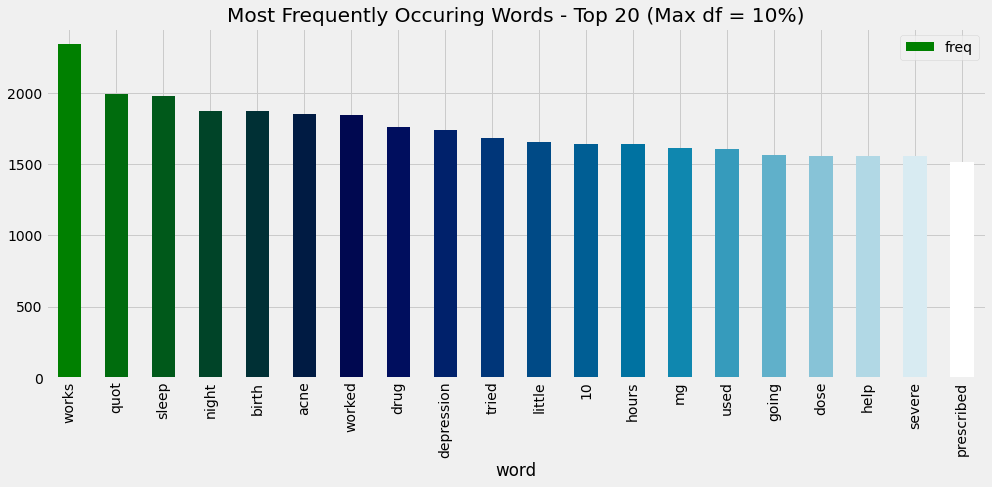

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer


cv = TfidfVectorizer(strip_accents=ascii, lowercase=True, analyzer='word', smooth_idf=True, stop_words = 'english', max_df=.10)
words = cv.fit_transform(train_data.review)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20 (Max df = 10%)")
plt.show()

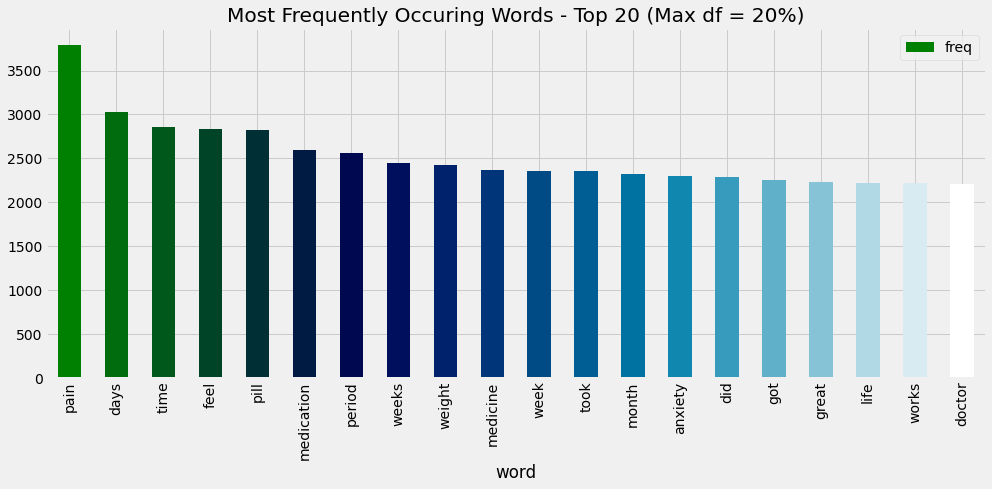

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer


cv = TfidfVectorizer(strip_accents=ascii, lowercase=True, analyzer='word', smooth_idf=True, stop_words = 'english', max_df=.20)
words = cv.fit_transform(train_data.review)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20 (Max df = 20%)")
plt.show()

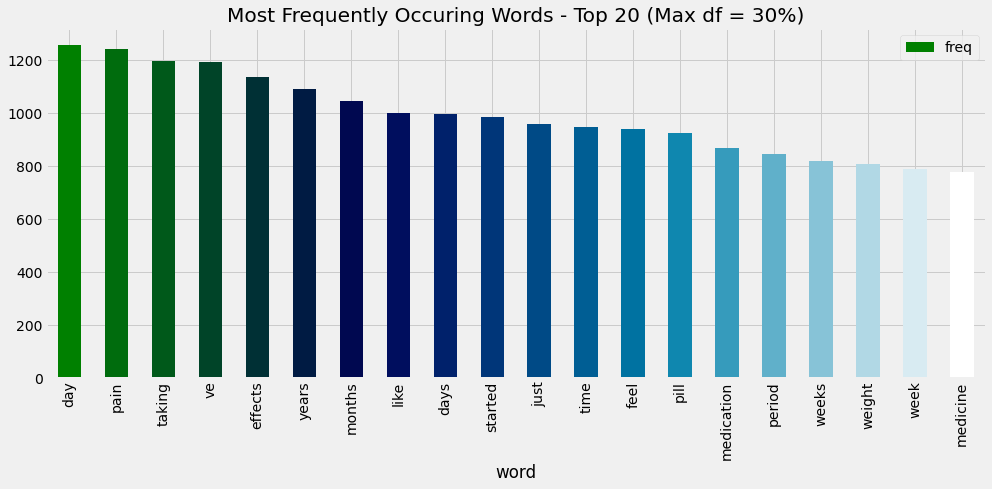

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


cv = TfidfVectorizer(strip_accents=ascii, lowercase=True, analyzer='word', smooth_idf=True, stop_words = 'english', max_df=.30)
words = cv.fit_transform(data.review)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20 (Max df = 30%)")
plt.show()

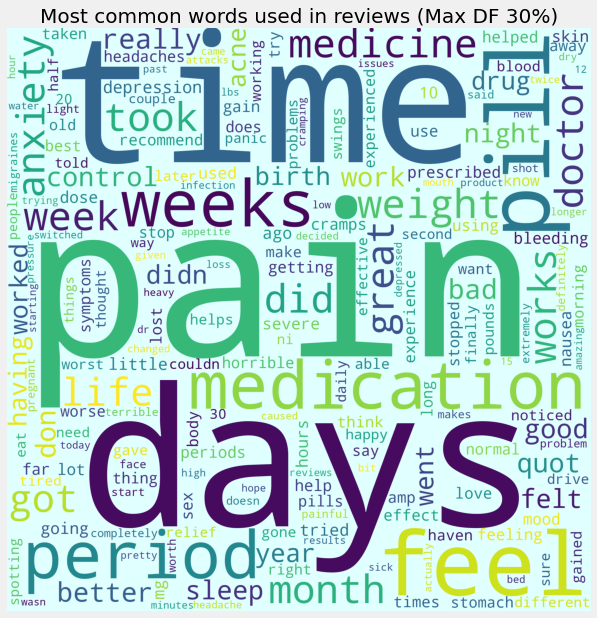

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Most common words used in reviews (Max DF 30%)", fontsize = 20)
plt.show()

> Plotting a wordscloud for the Words to see all the words, The Larger the words the larger is the frequency for that word. 

# Spacy

In [134]:
# fix all the messed up apostrophes in the data
clean_train_data = train_data.replace('&#039;', "'", regex=True)
clean_test_data = test_data.replace('&#039;', "'", regex=True)


In [135]:
import spacy
nlp = spacy.load('en')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15, 50):
    one_sentence = clean_train_data['review'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

nlp = spacy.load('en')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15, 50):
    one_sentence = clean_test_data['review'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)


In [136]:
# cleaning the text
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:

train_corpus = []
test_corpus = []

for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', clean_train_data['review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    train_corpus.append(review)
 
for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', clean_test_data['review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    test_corpus.append(review)
 

In [140]:
# creating bag of words

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)

x = cv.fit_transform(train_corpus).toarray()
y = data.iloc[:, 4].values

train_X = cv.transform(train_corpus).toarray()
test_X = cv.transform(test_corpus).toarray()

train_Y = train_dataframe['rating']

train_Y = train_dataframe['label']
model = LogisticRegression(C =1.5, solver='sag')


model.fit(train_X, train_Y)
model.fit(train_X, train_Y)
valid_Y_hat = model.predict(valid_X)



print(x.shape)
print(x)

print(y.shape)
print(y)


(3150, 2500)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(53766,)
[10.  8.  9. ...  8.  1.  9.]


In [ ]:
from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

ValueError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


# Modeling

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)


Training Accuracy : 0.9913832199546485
Testing Accuracy : 0.9322751322751323
[[ 23  52]
 [ 12 858]]


In [ ]:
# applying k fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9283764883764883
Standard Variance : 0.014572699477630336


In [ ]:

params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}


In [ ]:
# applying grid search with stratified folds

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv_object = StratifiedKFold(n_splits = 2)

grid = GridSearchCV(estimator = model, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid.fit(x_train, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [ ]:
print("Best Parameter Combination : {}".format(grid.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:

print("Mean Cross Validation Accuracy - Train Set : {}".format(grid.cv_results_['mean_train_score'].mean()*100))
print("Mean Cross Validation Accuracy - Validation Set : {}".format(grid.cv_results_['mean_test_score'].mean()*100))

from sklearn.metrics import accuracy_score
print("Accuracy Score for Test Set :", accuracy_score(y_test, y_pred))

Mean Cross Validation Accuracy - Train Set : 96.96733808800614
Mean Cross Validation Accuracy - Validation Set : 92.26757369614512
Accuracy Score for Test Set : 0.9322751322751323
